In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd



In [4]:
#read in the geojson files
data_2017 = gpd.read_file("C:/Users/sarah/OneDrive/Documents/Projects/project_3/Static/jupyter_notebook/data/accidents_2017.geojson")
data_2018 = gpd.read_file("C:/Users/sarah/OneDrive/Documents/Projects/project_3/Static/jupyter_notebook/data/accidents_2018.geojson")
data_2019 = gpd.read_file("C:/Users/sarah/OneDrive/Documents/Projects/project_3/Static/jupyter_notebook/data/accidents_2019.geojson")
data_2020 = gpd.read_file("C:/Users/sarah/OneDrive/Documents/Projects/project_3/Static/jupyter_notebook/data/accidents_2020.geojson")

In [26]:
#function to change geometry to lat/long and drop extra columns
def clean_data(df):
    #make a copy of the dataframe
    df_copy = df.copy()
    #change geometry to string then break into latitude and longitude columns
    df[["Lat", "Long"]] = df["geometry"].astype(str).str.extract(r'POINT \((-?\d+\.\d+) (-?\d+\.\d+)\)')
    #drop geometry, Easting, Northing
    df = df.drop(columns=['geometry', 'Easting', 'Northing'])
    #return dataframe and copy
    return df, df_copy



In [27]:
#run the function on the data
accidents_2017, accidents_2017_copy = clean_data(data_2017)
accidents_2018, accidents_2018_copy = clean_data(data_2018)
accidents_2019, accidents_2019_copy = clean_data(data_2019)
accidents_2020, accidents_2020_copy = clean_data(data_2020)

In [28]:
#check results
accidents_2018.head()

,Reference Number,Number of Vehicles,Accident Date,Time (24hr),1st Road Class,Road Surface,Lighting Conditions,Weather Conditions,Type of Vehicle 1,Casualty Class 1,...,Casualty Severity 5,Sex of Casualty 5,Age of Casualty 5,Type of Vehicle 6,Casualty Class 6,Casualty Severity 6,Sex of Casualty 6,Age of Casualty 6,Lat,Long
0,5131732,2,03/01/2018,2054,Unclassified,Wet / Damp,Darkness: street lights present and lit,Raining without high winds,Car,Driver or rider,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.76054,53.6965
1,5140196,2,04/01/2018,551,A,Wet / Damp,Darkness: street lights present and lit,Raining without high winds,Car,Driver or rider,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.78068,53.7005
2,5151479,2,05/01/2018,1650,Unclassified,Wet / Damp,Darkness: street lights present and lit,Fine without high winds,Car,Driver or rider,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.82229,53.7472
3,51A0239,2,10/01/2018,744,A,Wet / Damp,Daylight: street lights present,Fine without high winds,Motorcycle over 50cc and up to 125cc,Driver or rider,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.85177,53.7276
4,5.10E+227,4,14/01/2018,348,Motorway,Wet / Damp,Darkness: street lighting unknown,Fine without high winds,Car,Driver or rider,...,Slight,Male,40,NaN,NaN,NaN,NaN,NaN,-1.74807,53.6971


In [56]:
#number of accidents in each data set 
accident_count_17 = len(accidents_2017)
accident_count_18 = len(accidents_2018)
accident_count_19 = len(accidents_2019)
accident_count_20 = len(accidents_2020)

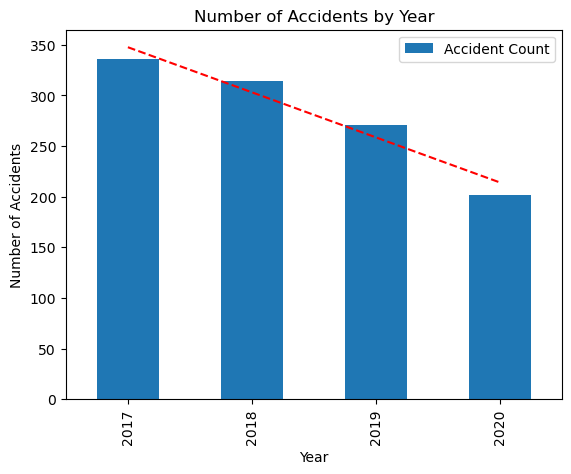

<Figure size 640x480 with 0 Axes>

In [68]:
#bar chart of number of accidents that happened each year
chart_data = {'Year': [2017, 2018, 2019, 2020],
              'Accident Count': [accident_count_17, accident_count_18, accident_count_19, accident_count_20]}
chart_data_df = pd.DataFrame(chart_data)

#make the chart
chart_data_df.plot(x='Year', y='Accident Count', kind='bar')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.title('Number of Accidents by Year')
#add a line coeffiecient
x = np.arange(len(chart_data_df))
y = chart_data_df['Accident Count']
coefficients = np.polyfit(x, y, 1)
trend_line = np.polyval(coefficients, x)

plt.plot(x, trend_line, color='red', linestyle='--', label='Trend Line')
plt.show()
plt.savefig('accident_count_year.jpg')

In [50]:
def split_casualty(df):
    accidents_high_casualty = df[df['Casualty Class 4'].notna() |
                                df['Casualty Class 5'].notna() |
                                df['Casualty Class 6'].notna()].drop(columns=['Type of Vehicle 1','Casualty Class 1', 'Casualty Severity 1', 'Sex of Casualty 1', 'Age of Casualty 1',
                                              'Type of Vehicle 2', 'Casualty Class 2', 'Casualty Severity 2', 'Sex of Casualty 2', 'Age of Casualty 2',
                                              'Type of Vehicle 3', 'Casualty Class 3', 'Casualty Severity 3', 'Sex of Casualty 3', 'Age of Casualty 3'])
    
    accidents_low_casualty = df.drop(columns=['Type of Vehicle 4','Casualty Class 4', 'Casualty Severity 4', 'Sex of Casualty 4', 'Age of Casualty 4',
                                              'Type of Vehicle 5', 'Casualty Class 5', 'Casualty Severity 5', 'Sex of Casualty 5', 'Age of Casualty 5',
                                              'Type of Vehicle 6', 'Casualty Class 6', 'Casualty Severity 6', 'Sex of Casualty 6', 'Age of Casualty 6'])
    
    return accidents_high_casualty, accidents_low_casualty

In [65]:
#2017 data seems to be formatted slightly differently
#accidents_high_casualty_2017, accidents_low_casualty_2017 = split_casualty(accidents_2017)

accidents_high_casualty_2018, accidents_low_casualty_2018 = split_casualty(accidents_2018)
accidents_high_casualty_2019, accidents_low_casualty_2019 = split_casualty(accidents_2019)
accidents_high_casualty_2020, accidents_low_casualty_2020 = split_casualty(accidents_2020)

In [67]:
accidents_low_casualty_2018.head()

,Reference Number,Number of Vehicles,Accident Date,Time (24hr),1st Road Class,Road Surface,Lighting Conditions,Weather Conditions,Type of Vehicle 1,Casualty Class 1,...,Casualty Severity 2,Sex of Casualty 2,Age of Casualty 2,Type of Vehicle 3,Casualty Class 3,Casualty Severity 3,Sex of Casualty 3,Age of Casualty 3,Lat,Long
0,5131732,2,03/01/2018,2054,Unclassified,Wet / Damp,Darkness: street lights present and lit,Raining without high winds,Car,Driver or rider,...,Slight,Male,41,NaN,Vehicle or pillion passenger,Slight,Male,38,-1.76054,53.6965
1,5140196,2,04/01/2018,551,A,Wet / Damp,Darkness: street lights present and lit,Raining without high winds,Car,Driver or rider,...,not known,not known,not known,NaN,NaN,NaN,NaN,NaN,-1.78068,53.7005
2,5151479,2,05/01/2018,1650,Unclassified,Wet / Damp,Darkness: street lights present and lit,Fine without high winds,Car,Driver or rider,...,not known,not known,not known,NaN,NaN,NaN,NaN,NaN,-1.82229,53.7472
3,51A0239,2,10/01/2018,744,A,Wet / Damp,Daylight: street lights present,Fine without high winds,Motorcycle over 50cc and up to 125cc,Driver or rider,...,not known,not known,not known,NaN,NaN,NaN,NaN,NaN,-1.85177,53.7276
4,5.10E+227,4,14/01/2018,348,Motorway,Wet / Damp,Darkness: street lighting unknown,Fine without high winds,Car,Driver or rider,...,Slight,Male,35,Car,Driver or rider,Slight,Male,36,-1.74807,53.6971
